In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mdtraj as mdj
import pandas as pd
import nglview as nv
import plumed


In [6]:
def readPMF(filePath):
    """read a 1D PMF file

    Args:
        filePath (str): the path of the PMF file

    Returns:
        np.array (float, 2*N): ((x0,x1,x2, ...), (y0, y1, y2, ...))
    """
    
    data = np.loadtxt(filePath)
    x = data[:,0]
    y = data[:,1]

    return np.array((x, y)).T

    

+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/ndonyapour/miniconda3/envs/bfee2/lib/libplumedKernel.so" +++


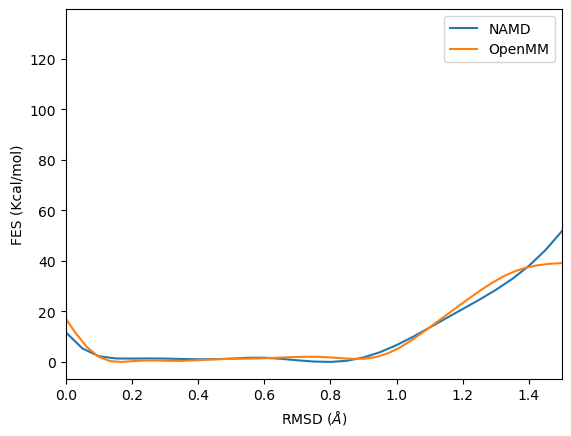

In [12]:
pmf = readPMF('../BFEE_NAMD/001_RMSDBound/output/abf_1.abf1.czar.pmf')
pmf.shape
plt.plot(pmf[:, 0], pmf[:, 1], label="NAMD")
# Read Openmm FES 
data = plumed.read_as_pandas("../../openmm_bfee2_2wi3/analysis/rmsdbound.dat")
#plot fes
plt.plot(data["rmsd"] * 10,data["file.free"] /4.184,  label="OpenMM")
plt.xlabel(r'RMSD ($\AA$)')
plt.ylabel('FES (Kcal/mol)')
plt.legend(loc="best")
plt.xlim(0, 1.5)
plt.savefig('figures/rmsdbound_NAMD_Openmm_fes.png')